In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
import tldextract
import re
import itertools

In [3]:
df = pd.read_csv(r'C:/Users/eprmitr/Desktop/Blogs/AI-ML/Malicious_urls.csv', sep = ',')

In [4]:
print("The sample size of the dataset is:",df.shape[0],"rows and ", df.shape[1], "features")

The sample size of the dataset is: 420464 rows and  2 features


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 2 columns):
url      420464 non-null object
label    420464 non-null object
dtypes: object(2)
memory usage: 6.4+ MB


In [6]:
df.head(5)

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [7]:
#!pip install tldextract

In [8]:
def parsing(url):
    subdomain, domain, domain_suffix = (i for i in tldextract.extract(url))
    return [subdomain, domain, domain_suffix]

def ETL(data):
    data2 = data['url']
    #print(data2)
    data3 = [parsing(i) for i in data2]
    #print(data3)
    data3 = pd.DataFrame(data3,columns=['subdomain', 'domain', 'TLD'])
    data = data.reset_index(drop=True)
    data = pd.concat([data,data3], axis=1)
    return data

In [9]:
df=ETL(df)

In [10]:
df.head()

,url,label,subdomain,domain,TLD
0,diaryofagameaddict.com,bad,,diaryofagameaddict,com
1,espdesign.com.au,bad,,espdesign,com.au
2,iamagameaddict.com,bad,,iamagameaddict,com
3,kalantzis.net,bad,,kalantzis,net
4,slightlyoffcenter.net,bad,,slightlyoffcenter,net


In [11]:
df.isnull().sum()

url          0
label        0
subdomain    0
domain       0
TLD          0
dtype: int64

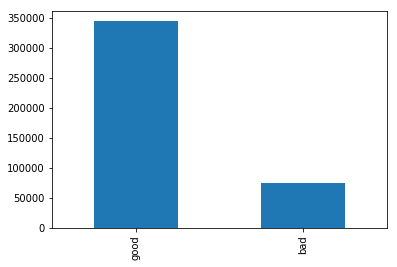

In [12]:
df.label.value_counts().plot(kind='bar')

# Data Preparation

We dont need the "URL" anymore so lets drop it

In [13]:
df=df.drop(['url'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 4 columns):
label        420464 non-null object
subdomain    420464 non-null object
domain       420464 non-null object
TLD          420464 non-null object
dtypes: object(4)
memory usage: 12.8+ MB


In [15]:
df[['subdomain','domain','TLD']]

,subdomain,domain,TLD
0,,diaryofagameaddict,com
1,,espdesign,com.au
2,,iamagameaddict,com
3,,kalantzis,net
4,,slightlyoffcenter,net
5,,toddscarwash,com
6,,tubemoviez,com
7,,ipl,hk
8,,crackspider,us
9,,pos-kupang,com


In [16]:
df.head()

,label,subdomain,domain,TLD
0,bad,,diaryofagameaddict,com
1,bad,,espdesign,com.au
2,bad,,iamagameaddict,com
3,bad,,kalantzis,net
4,bad,,slightlyoffcenter,net


All the features are categorical so lets encode all of them

In [17]:
le = LabelEncoder()
col = df.columns
df[col] = df[col].apply(lambda c:le.fit_transform(c))

# Model Train & Test

In [18]:
Y=df.label
X=df.drop(['label'],axis=1)
### splitting data in training and test set
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

### Shape of the training and test set
print("====x_train,x_test,y_train,y_test shapes are as below====")
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

====x_train,x_test,y_train,y_test shapes are as below====
(336371, 3) (84093, 3) (336371,) (84093,)


# Confusion Matrix function

In [19]:
def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()

# Random Forest Classification

C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


====Confusion Matrix====


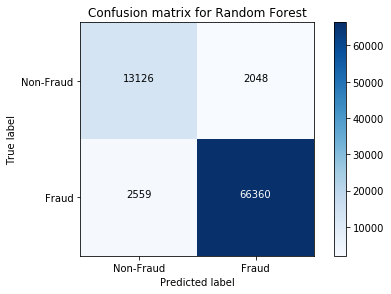

======Model Accuracy=======
DT Train Accuracy ::  0.993200959654667
DT Test Accuracy  ::  0.9452154162653253


====Classification Report====


              precision    recall  f1-score   support

           0       0.84      0.87      0.85     15174
           1       0.97      0.96      0.97     68919

   micro avg       0.95      0.95      0.95     84093
   macro avg       0.90      0.91      0.91     84093
weighted avg       0.95      0.95      0.95     84093

Wall time: 19.7 s


In [22]:
%%time
rforest=RandomForestClassifier(criterion='entropy')
rforest.fit(x_train,y_train)
y_pred=rforest.predict(x_test)
cnf_matrix_rforest=confusion_matrix(y_test,y_pred)
print("====Confusion Matrix====")
plt.figure()
plot_confusion_matrix(cnf_matrix_rforest, title='Confusion matrix for Random Forest')
plt.show()
print("======Model Accuracy=======") 
print ("DT Train Accuracy :: ", accuracy_score(y_train, rforest.predict(x_train)))
print ("DT Test Accuracy  :: ", accuracy_score(y_test, y_pred))
print("\n")
print("====Classification Report====")
print("\n")
print(classification_report(y_test,y_pred))

# Decision Tree Classification

======Confusion Matrix=======


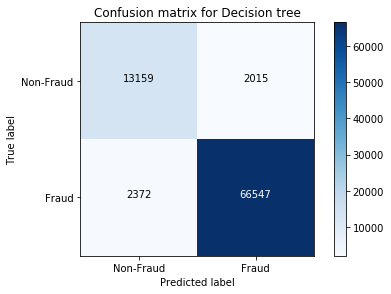

======Model Accuracy=======
DT Train Accuracy ::  0.9992508272116205
DT Test Accuracy  ::  0.9478315674312963


======Classification Report=======
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     15174
           1       0.97      0.97      0.97     68919

   micro avg       0.95      0.95      0.95     84093
   macro avg       0.91      0.92      0.91     84093
weighted avg       0.95      0.95      0.95     84093

Wall time: 4.26 s


In [23]:
%%time
dtree=DecisionTreeClassifier(max_depth=100,criterion='entropy')
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
cnf_matrix_dtree=confusion_matrix(y_test,y_pred)
print("======Confusion Matrix=======")
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for Decision tree')
plt.show()
print("======Model Accuracy=======") 
print ("DT Train Accuracy :: ", accuracy_score(y_train, dtree.predict(x_train)))
print ("DT Test Accuracy  :: ", accuracy_score(y_test, y_pred))
print('\n')
print("======Classification Report=======") 
print(classification_report(y_test,y_pred))